In [1]:
import sys
sys.path.append('/home/sejones/workspace/src')

import pricing.black_scholes as bs
import simulation.sim as sim
import os

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tseries.offsets import BDay

data_dir = os.path.join(os.getcwd(),"../data")

In [2]:
np.random.seed(2)

## Simulate asset price paths

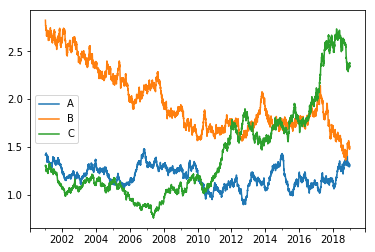

In [3]:
spot_path = os.path.join(data_dir,"spot")
divs_path = os.path.join(data_dir,"divs")
generate_spot = False
if generate_spot:
    paths, divs = sim.simulate_spot(["A","B","C"], dt.date(2001,1,1), dt.date(2019,1,1), 0.1, 0.03)
    paths.to_pickle(spot_path)
    divs.to_pickle(divs_path)
else:
    paths = pd.read_pickle(spot_path)
    divs = pd.read_pickle(divs_path)
paths.plot()
None

In [4]:
denorm_path = os.path.join(data_dir,"denorm")
generate_opt_data = False
if generate_opt_data:
    denorm = sim.generate_option_data(paths.index, underlyings)
    denorm.to_pickle(denorm_path)
else:
    denorm = pd.read_pickle(denorm_path)

In [5]:
denorm.head()

,valuation_date,expiry_date,strike,underlying,payoff,opt_id,expiry_time
0,2001-01-01,2001-01-31,0.05,A,C,A_20010131_0005_C,0.082192
1,2001-01-01,2001-01-31,0.05,A,P,A_20010131_0005_P,0.082192
2,2001-01-01,2001-01-31,0.05,B,C,B_20010131_0005_C,0.082192
3,2001-01-01,2001-01-31,0.05,B,P,B_20010131_0005_P,0.082192
4,2001-01-01,2001-01-31,0.05,C,C,C_20010131_0005_C,0.082192


In [6]:
implied_vol = 0.11
denorm_path = os.path.join(data_dir,"price_denorm")
generate_opt_data = False
if generate_opt_data:
    denorm = sim.price_options(denorm, paths, implied_vol)
    denorm.to_pickle(denorm_path)
else:
    denorm = pd.read_pickle(denorm_path)

In [7]:
denorm.head()

,valuation_date,expiry_date,strike,underlying,payoff,opt_id,expiry_time,spot,implied_vol,price,delta,gamma,vega,theta
0,2001-01-01,2001-01-31,0.05,A,C,A_20010131_0005_C,0.082192,1.415062,0.11,1.365062,1.0,0.0,0.0,-0.0
1,2001-01-01,2001-01-31,0.05,A,P,A_20010131_0005_P,0.082192,1.415062,0.11,0.000000,-0.0,0.0,0.0,-0.0
2,2001-01-01,2001-01-31,0.05,B,C,B_20010131_0005_C,0.082192,2.826250,0.11,2.776250,1.0,0.0,0.0,-0.0
3,2001-01-01,2001-01-31,0.05,B,P,B_20010131_0005_P,0.082192,2.826250,0.11,0.000000,-0.0,0.0,0.0,-0.0
4,2001-01-01,2001-01-31,0.05,C,C,C_20010131_0005_C,0.082192,1.299225,0.11,1.249225,1.0,0.0,0.0,-0.0


In [8]:
path = os.path.join(data_dir,"vehicle")
do_vehicle_selection = False
if do_vehicle_selection:
    traded_options = sim.vehicle_selection(denorm, 1./12.)
    traded_options.to_pickle(path)
else:
    traded_options = pd.read_pickle(path)

In [9]:
path = os.path.join(data_dir,"vehicle_paths")
do_vehicle_path_constuction = True
if do_vehicle_path_constuction:
    vehicle_paths = sim.build_price_frame(paths.index, traded_options, denorm)
    vehicle_paths.to_pickle(path)
else:
    vehicle_paths = pd.read_pickle(path)

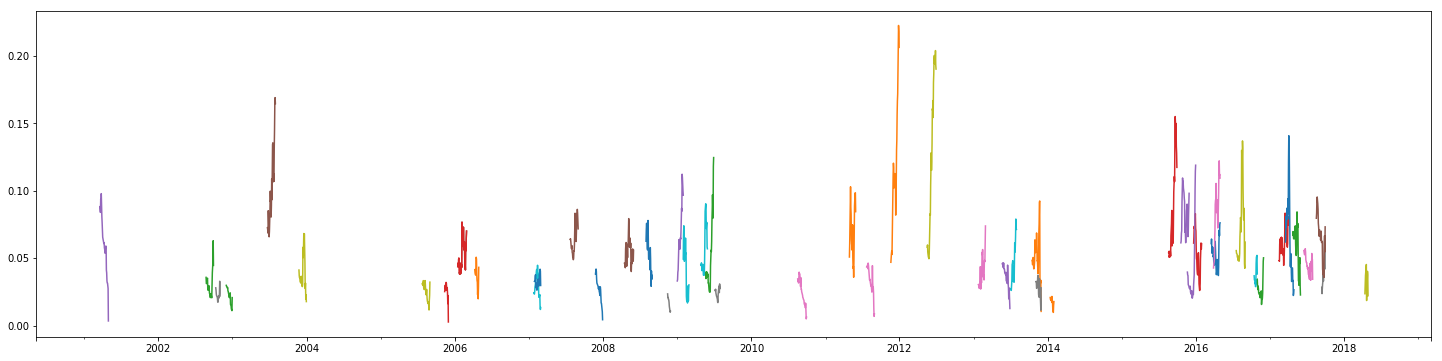

In [11]:
vehicle_paths.sample(50, axis=1).plot(legend=False, figsize=(25,6))
None